In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
raw_df = pd.read_csv("datasets/boston.csv", sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target
X.shape

(506, 13)

In [21]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [22]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [24]:
import time
from sklearn.linear_model import LinearRegression

model = LinearRegression()

start = time.time()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(time.time()-start, train_score, cv_score))

LinearRegression()

elaspe: 0.001943; train_score: 0.723941; cv_score: 0.795262


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("normalize", StandardScaler(with_mean=False)),
                         ("linear_regression", linear_regression)])
    return pipeline

model = polynomial_model(degree=2)

start = time.time()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(time.time()-start, train_score, cv_score))

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('normalize', StandardScaler(with_mean=False)),
                ('linear_regression', LinearRegression())])

elaspe: 0.017041; train_score: 0.930547; cv_score: 0.860049


<Figure size 1296x288 with 0 Axes>

<Figure size 3600x800 with 0 Axes>

<AxesSubplot:>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

<AxesSubplot:>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

<AxesSubplot:>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

elaspe: 15.097760


<Figure size 1296x288 with 0 Axes>

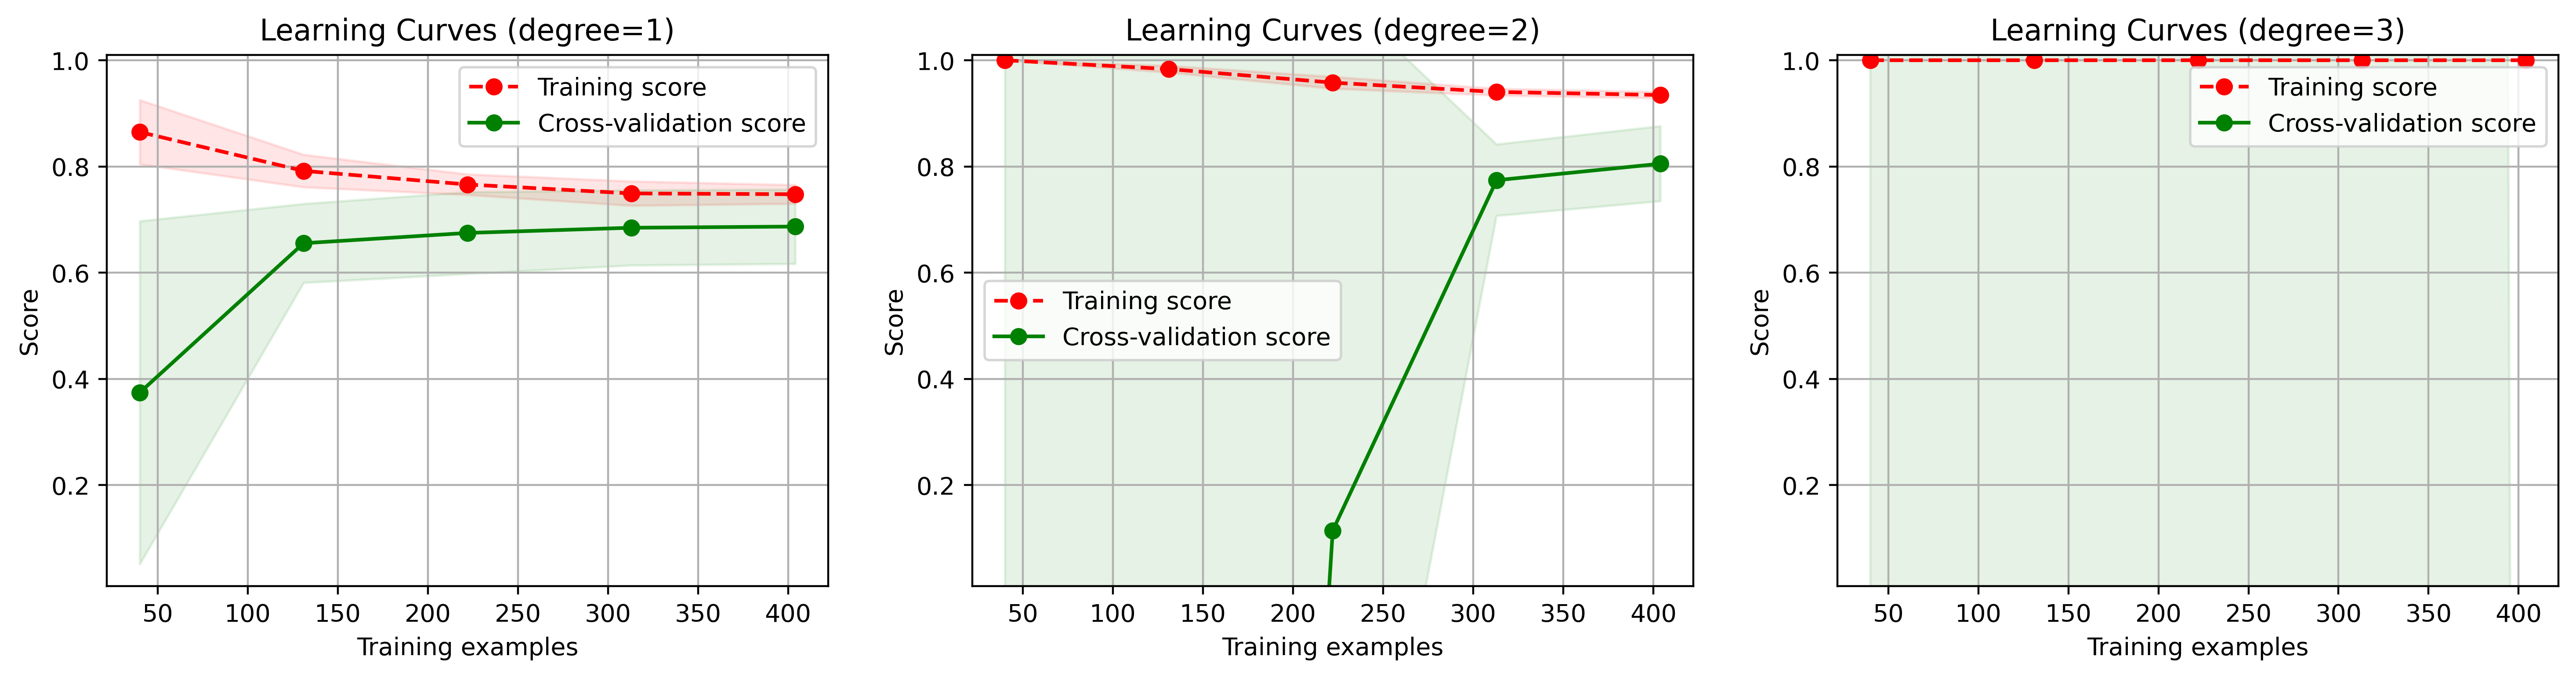

In [26]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4))
title = 'Learning Curves (degree={0})'
degrees = [1, 2, 3]

start = time.time()
plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(plt, polynomial_model(degrees[i]), title.format(degrees[i]), X, y, ylim=(0.01, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.time()-start))